## 1. Load data

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import muon as mu

2024-09-23 13:47:01.801074: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:
# Setting figure parameters
sc.settings.verbosity = 0
sns.set(rc={"figure.figsize": (4, 3.5), "figure.dpi": 100})
sns.set_style("whitegrid")

In [1]:
#!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_peak_annotation.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5231k  100 5231k    0     0  2041k      0  0:00:02  0:00:02 --:--:-- 2041kk      0  0:00:03  0:00:02  0:00:01 1333k


In [2]:
#!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz
#!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1956M  100 1956M    0     0  4794k      0  0:06:57  0:06:57 --:--:-- 3708k     0  0:05:14  0:00:24  0:04:50 7286k7k      0  0:06:12  0:01:34  0:04:38 4606k   0     0  5203k      0  0:06:24  0:03:09  0:03:15 4752k215k      0  0:06:24  0:03:24  0:03:00 5827k      0  0:06:22  0:03:32  0:02:50 5772kk      0  0:06:30  0:03:44  0:02:46 2781kM    0     0  4788k      0  0:06:58  0:04:11  0:02:47 2273k 0  4773k      0  0:06:59  0:04:13  0:02:46 2470k4k      0  0:07:03  0:04:18  0:02:45 2265k1245M    0     0  4611k      0  0:07:14  0:04:36  0:02:38 3171k   0  4546k      0  0:07:20  0:05:03  0:02:17 4698k04M    0     0  4775k      0  0:06:59  0:06:05  0:00:54 4494k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1003k  100 10

In [3]:
#!curl -O https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  154M  100  154M    0     0  4923k      0  0:00:32  0:00:32 --:--:-- 3889k0  0:00:31  0:00:05  0:00:26 5278k


In [4]:
#!mkdir pbmc10k

In [6]:
#!mv pbmc_granulocyte* pbmc10k

In [15]:
#data_dir = './pbmc10k'

In [16]:
#import os

In [17]:
#Remove file prefixes
prefix = "pbmc_granulocyte_sorted_10k_"
for file in os.listdir(data_dir):
    if file.startswith(prefix):
        new_filename = file[len(prefix):]
        os.rename(os.path.join(data_dir, file), os.path.join(data_dir, new_filename))

In [23]:
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_feature_bc_matrix.h5"))

/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from ./pbmc10k/filtered_feature_bc_matrix.h5


/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/mudata/_core/mudata.py:477: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


Added peak annotation from ./pbmc10k/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: ./pbmc10k/atac_fragments.tsv.gz


In [24]:
mdata.var_names_make_unique()

In [26]:
mdata.write("pbmc10k.h5mu")

In [89]:
mdata = mu.read("pbmc10k.h5mu")
mdata

MuData object with n_obs × n_vars = 11909 × 144978
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11909 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

The ATAC modality contains two entries in the unstructured data slot that contain the peak annotation and the path to the fragment file automatically located by muon.

In [90]:
mdata.mod['atac'].uns

{'atac': {'peak_annotation':                                peak  distance peak_type
  gene_name                                              
  MIR1302-2HG        chr1:10109-10357    -19197    distal
  AL627309.5       chr1:180730-181630     -6869    distal
  AL627309.5       chr1:191491-191736    -17630    distal
  AP006222.2       chr1:267816-268196       962    distal
  AC114498.1       chr1:586028-586373     -1256    distal
  ...                             ...       ...       ...
  AC213203.2   KI270713.1:20444-22615      9913    distal
  AC213203.2   KI270713.1:27118-28927      3601    distal
  AC213203.2   KI270713.1:29485-30706      1822    distal
  AC213203.2   KI270713.1:31511-32072       456    distal
  AC213203.1   KI270713.1:37129-37638      1723    distal
  
  [141066 rows x 3 columns]},
 'files': {'fragments': './pbmc10k/atac_fragments.tsv.gz'}}

In [91]:
atac = mdata.mod["atac"]
atac

AnnData object with n_obs × n_vars = 11909 × 108377
    var: 'gene_ids', 'feature_types', 'genome', 'interval'
    uns: 'atac', 'files'

## 2. Quality control

### 2.1. Doublet detection

In [10]:
import os

os.environ['R_HOME'] = '/Applications/anaconda3/envs/SCanalysis/lib/R'

In [11]:
# Packages enabling to run R code
import rpy2.rinterface_lib.callbacks
import logging
from rpy2.robjects import pandas2ri
import anndata2ri

In [12]:
pandas2ri.activate()  # Automatically convert rpy2 outputs to pandas DataFrames
anndata2ri.activate()
%load_ext rpy2.ipython

/var/folders/ly/mwzzbn7j7yd69hdl9hq_23540000gn/T/ipykernel_19031/861610988.py:2: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [13]:
%%R
print("Hello from R!")

[1] "Hello from R!"


In [14]:
%%R
suppressPackageStartupMessages(library(scDblFinder))
suppressPackageStartupMessages(library(SingleCellExperiment))

In [17]:
#save list of barcode
barcodes = list(atac.obs_names)

In [23]:
#To enable the transfer of our data matrix to an SingleCellExperiment R object
#we transpose (.T) and convert the sparse matrix in the atac.X slot into an array (.A). 
data_mat = atac.X.T.toarray()

In [24]:
#Count distribution-based doublet scoring
%R -i data_mat -o dbl_score sce <- scDblFinder(SingleCellExperiment(list(counts=data_mat)), \
                                               clusters=TRUE, aggregateFeatures=TRUE, nfeatures=25, \
                                               processing="normFeatures"); dbl_score <- sce$scDblFinder.score

Aggregating features...
Clustering cells...
Warning in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE,  :
  You're computing too large a percentage of total singular values, use a standard svd instead.
9 clusters
Creating ~9528 artificial doublets...
Dimensional reduction
Evaluating kNN...
Training model...
iter=0, 1114 cells excluded from training.
iter=1, 1114 cells excluded from training.
iter=2, 1114 cells excluded from training.
Threshold found:0.4
1500 (12.6%) doublets called
Además: Warning message:
In .checkSCE(sce) :
  Some cells in `sce` have an extremely low read counts; note that these could trigger errors and might best be filtered out


array([0.44624792, 0.29090772, 0.11134703, ..., 0.        , 0.28792639,
       0.30510247])

Based on the output 12.6% are suggested to be doulets.

In [27]:
scDbl_result = pd.DataFrame({"barcodes": barcodes, "scDblFinder_score": dbl_score})
scDbl_result.to_csv("scDblFinder_scores_pbmc10k.csv")

In [29]:
scDbl_result.head()

,barcodes,scDblFinder_score
0,AAACAGCCAAGGAATC-1,0.446248
1,AAACAGCCAATCCCTT-1,0.290908
2,AAACAGCCAATGCGCT-1,0.111347
3,AAACAGCCACACTAAT-1,0.012987
4,AAACAGCCACCAACCG-1,0.103926


In [30]:
scDbl_result = scDbl_result.set_index("barcodes")
scDbl_result.head()

,scDblFinder_score
barcodes,
AAACAGCCAAGGAATC-1,0.446248
AAACAGCCAATCCCTT-1,0.290908
AAACAGCCAATGCGCT-1,0.111347
AAACAGCCACACTAAT-1,0.012987
AAACAGCCACCAACCG-1,0.103926


In [92]:
#add the column to adata.obs
atac.obs["scDblFinder_score"] = scDbl_result["scDblFinder_score"]

In [93]:
atac.obs

,scDblFinder_score
AAACAGCCAAGGAATC-1,0.446248
AAACAGCCAATCCCTT-1,0.290908
AAACAGCCAATGCGCT-1,0.111347
AAACAGCCACACTAAT-1,0.012987
AAACAGCCACCAACCG-1,0.103926
...,...
TTTGTTGGTGTTAAAC-1,0.150308
TTTGTTGGTTAGGATT-1,0.022848
TTTGTTGGTTGCAGTA-1,0.000000
TTTGTTGGTTGGTTAG-1,0.287926


In [94]:
#Threshold found:0.4
threshold = 0.4
atac.obs["scDblFinder_class"] = atac.obs["scDblFinder_score"].apply(lambda x: 'doublet' if x >= threshold else 'singlet')

In [95]:
atac.obs["scDblFinder_class"].value_counts()

scDblFinder_class
singlet    10409
doublet     1500
Name: count, dtype: int64

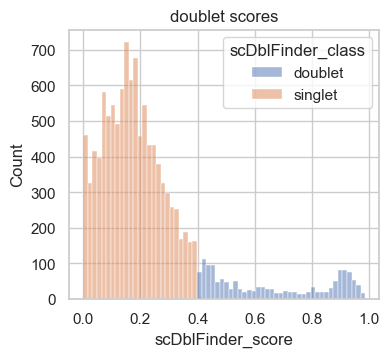

In [96]:
sns.histplot(x=atac.obs["scDblFinder_score"], hue=atac.obs["scDblFinder_class"])
plt.title("doublet scores")
plt.show()

In [97]:
atac = atac[atac.obs["scDblFinder_class"] == 'singlet']

In [100]:
atac.write("pbmc10k_atac_doublet.h5mu")

### 2.2. Calculating QC metrics

- total_counts = total_fragment_counts 
- n_genes_by_counts = n_features_per_cell

In [101]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

In [102]:
atac.obs.rename(columns={ "n_genes_by_counts": "n_features_per_cell",\
                         "total_counts": "total_fragment_counts",},\
                inplace=True
               )

In [103]:
atac

AnnData object with n_obs × n_vars = 10409 × 108377
    obs: 'scDblFinder_score', 'scDblFinder_class', 'n_features_per_cell', 'total_fragment_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'

In [104]:
#log-transform total counts and add as column
atac.obs["log_total_fragment_counts"] = np.log10(atac.obs["total_fragment_counts"])

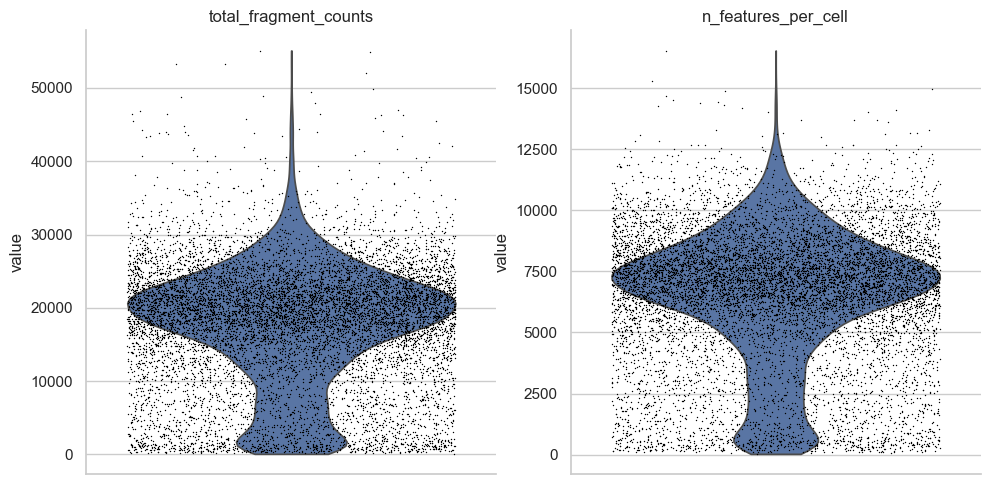

In [105]:
sc.pl.violin(atac, ['total_fragment_counts', 'n_features_per_cell'], jitter=0.4, multi_panel=True)

### 2.3. Filtering cells

### 2.4. Filtering features